In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objs as go

import torch
import torch.nn as nn

In [6]:
lm.LinearRegression?

In [2]:
gender = pd.read_csv("gender.csv")
gender = gender.drop(['Unnamed: 0', 'School'], axis = 1)

eth = pd.read_csv("race.csv")
eth = eth.drop(['Unnamed: 0', 'School'], axis = 1).rename(columns = {'Uad Uc Ethn 6 Cat': 'Ethnicity'})

In [3]:
gender

,Calculation1,City,County/State/ Territory,Count,Gender,Pivot Field Values
0,21ST CENTURY EXPERIMENTAL SCH694223,NaN,NaN,App,Male,5
1,21ST CENTURY EXPERIMENTAL SCH694223,NaN,NaN,App,Female,6
2,21ST CENTURY EXPERIMENTAL SCH694223,NaN,NaN,App,All,11
3,A & M CONSOLIDATED HIGH SCHOOL441400,College Station,TX,App,Male,6
4,A & M CONSOLIDATED HIGH SCHOOL441400,College Station,TX,Adm,Female,4
...,...,...,...,...,...,...
8312,ZHIXIN HIGH SCHOOL694022,NaN,NaN,App,Male,7
8313,ZHIXIN HIGH SCHOOL694022,NaN,NaN,App,Female,7
8314,ZHIXIN HIGH SCHOOL694022,NaN,NaN,App,All,14
8315,ZIBO EXPERIMENTAL HIGH SCHOOL694601,NaN,NaN,App,All,6


In [37]:
print(gender[['Calculation1', 'County/State/ Territory', 'Count', 'Gender', 'Pivot Field Values']] \
.rename(columns = {'Pivot Field Values': 'Value', 
                   'County/State/ Territory': 'Location',
                   'Calculation1': 'Name'}) \
.sample(5, random_state=10060000) \
.to_latex(index=False))

\begin{tabular}{llllr}
\toprule
                                 Name &       Location & Count &  Gender &  Value \\
\midrule
   SHANGHAI SMIC PRIVATE SCHOOL694240 &            NaN &   App &    Male &     18 \\
           HOLLYWOOD HIGH SCHOOL51615 &    Los Angeles &   App &  Female &     29 \\
  INTERNATIONAL HIGH SCHOOL FAIS52943 &  San Francisco &   App &  Female &     27 \\
            PIONEER HIGH SCHOOL230088 &             MI &   Adm &  Female &      5 \\
 OAKRIDGE INT SCH NEWTON CAMPUS671040 &            NaN &   Adm &     All &      3 \\
\bottomrule
\end{tabular}



In [33]:
print(gender[['Calculation1', 'County/State/ Territory', 'Count', 'Gender', 'Pivot Field Values']] \
.rename(columns = {'Pivot Field Values': 'Value', 
                   'County/State/ Territory': 'Location',
                   'Calculation1': 'Name'}) \
.iloc[11:19, :] \
.to_latex(index=False))

\begin{tabular}{llllr}
\toprule
                             Name &       Location & Count &  Gender &  Value \\
\midrule
 ABRAHAM LINCOLN HIGH SCHOOL52910 &  San Francisco &   Adm &    Male &      3 \\
 ABRAHAM LINCOLN HIGH SCHOOL52910 &  San Francisco &   App &    Male &     52 \\
 ABRAHAM LINCOLN HIGH SCHOOL52910 &  San Francisco &   Enr &  Female &      6 \\
 ABRAHAM LINCOLN HIGH SCHOOL52910 &  San Francisco &   Adm &  Female &      6 \\
 ABRAHAM LINCOLN HIGH SCHOOL52910 &  San Francisco &   App &  Female &     57 \\
 ABRAHAM LINCOLN HIGH SCHOOL52910 &  San Francisco &   Enr &     All &      7 \\
 ABRAHAM LINCOLN HIGH SCHOOL52910 &  San Francisco &   Adm &     All &      9 \\
 ABRAHAM LINCOLN HIGH SCHOOL52910 &  San Francisco &   App &     All &    109 \\
\bottomrule
\end{tabular}



In [4]:
print(gender.head().to_latex())

\begin{tabular}{llllllr}
\toprule
{} &                          Calculation1 &             City & County/State/ Territory & Count &  Gender &  Pivot Field Values \\
\midrule
0 &   21ST CENTURY EXPERIMENTAL SCH694223 &              NaN &                     NaN &   App &    Male &                   5 \\
1 &   21ST CENTURY EXPERIMENTAL SCH694223 &              NaN &                     NaN &   App &  Female &                   6 \\
2 &   21ST CENTURY EXPERIMENTAL SCH694223 &              NaN &                     NaN &   App &     All &                  11 \\
3 &  A \& M CONSOLIDATED HIGH SCHOOL441400 &  College Station &                      TX &   App &    Male &                   6 \\
4 &  A \& M CONSOLIDATED HIGH SCHOOL441400 &  College Station &                      TX &   Adm &  Female &                   4 \\
\bottomrule
\end{tabular}



In [7]:
print(eth.head().to_latex())

\begin{tabular}{llllllr}
\toprule
{} &                          Calculation1 &             City & County/State/ Territory & Count & Ethnicity &  Pivot Field Values \\
\midrule
0 &   21ST CENTURY EXPERIMENTAL SCH694223 &              NaN &                     NaN &   App &       All &                  11 \\
1 &  A \& M CONSOLIDATED HIGH SCHOOL441400 &  College Station &                      TX &   Adm &     Asian &                   4 \\
2 &  A \& M CONSOLIDATED HIGH SCHOOL441400 &  College Station &                      TX &   App &     Asian &                   8 \\
3 &  A \& M CONSOLIDATED HIGH SCHOOL441400 &  College Station &                      TX &   Adm &       All &                   6 \\
4 &  A \& M CONSOLIDATED HIGH SCHOOL441400 &  College Station &                      TX &   App &       All &                  11 \\
\bottomrule
\end{tabular}



In [38]:
# features: proportion of applicants that were male
# proportion admitted male

# target: in state or not AND in state, out of state, international

In [39]:
# we need schools with both numbers for # of students applied and # of students admitted
# so we need to do some wranging to get that

In [40]:
gender_filtered = gender.groupby('Calculation1').filter(lambda df: len(df.loc[df['Count'] == 'Adm', 'Count']) > 0)

In [41]:
gender_filtered

,Calculation1,City,County/State/ Territory,Count,Gender,Pivot Field Values
3,A & M CONSOLIDATED HIGH SCHOOL441400,College Station,TX,App,Male,6
4,A & M CONSOLIDATED HIGH SCHOOL441400,College Station,TX,Adm,Female,4
5,A & M CONSOLIDATED HIGH SCHOOL441400,College Station,TX,Adm,All,6
6,A & M CONSOLIDATED HIGH SCHOOL441400,College Station,TX,App,All,11
7,A B MILLER HIGH SCHOOL50944,Fontana,San Bernardino,Adm,Male,3
...,...,...,...,...,...,...
8305,YUCAIPA SENIOR HIGH SCHOOL53820,Yucaipa,San Bernardino,App,All,19
8306,ZHENGZHOU FOREIGN LANGUAGE SCH694361,NaN,NaN,App,Male,39
8307,ZHENGZHOU FOREIGN LANGUAGE SCH694361,NaN,NaN,App,Female,31
8308,ZHENGZHOU FOREIGN LANGUAGE SCH694361,NaN,NaN,Adm,All,3


In [42]:
# not all schools have numbers for all categories – we need to interpolate them for consistency

In [43]:
all_count, male_count, female_count = 0, 0, 0

In [44]:
for name, df in gender_filtered.groupby('Calculation1'):
    app = df.loc[df['Count'] == 'App', 'Gender']
    app = sorted(app.tolist())
    
    if app == ['All']:
        # No gender data
        pass
    
    if app == sorted(['All', 'Female', 'Male']):
#         print('has all')
        all_count += 1

    if app == ['All', 'Male']:
#         print(name)
        male_count += 1
    
    if app == ['All', 'Female']:
        female_count += 1
    
#     print(df)

In [45]:
# jk – the majority of schools do have all of that data, let's just work with them

In [46]:
gender_filtered = gender_filtered.groupby('Calculation1').filter(
    lambda df: (sorted(df.loc[df['Count'] == 'App', 'Gender'].tolist()) == ['All', 'Female', 'Male']) &
               (sorted(df.loc[df['Count'] == 'Adm', 'Gender'].tolist()) == ['All', 'Female', 'Male'])

)

In [47]:
gender_filtered

,Calculation1,City,County/State/ Territory,Count,Gender,Pivot Field Values
11,ABRAHAM LINCOLN HIGH SCHOOL52910,San Francisco,San Francisco,Adm,Male,3
12,ABRAHAM LINCOLN HIGH SCHOOL52910,San Francisco,San Francisco,App,Male,52
13,ABRAHAM LINCOLN HIGH SCHOOL52910,San Francisco,San Francisco,Enr,Female,6
14,ABRAHAM LINCOLN HIGH SCHOOL52910,San Francisco,San Francisco,Adm,Female,6
15,ABRAHAM LINCOLN HIGH SCHOOL52910,San Francisco,San Francisco,App,Female,57
...,...,...,...,...,...,...
8267,YONGSAN INTL SCHOOL SEOUL682230,NaN,NaN,Adm,Female,7
8268,YONGSAN INTL SCHOOL SEOUL682230,NaN,NaN,App,Female,22
8269,YONGSAN INTL SCHOOL SEOUL682230,NaN,NaN,Enr,All,4
8270,YONGSAN INTL SCHOOL SEOUL682230,NaN,NaN,Adm,All,11


In [48]:
df = pd.pivot_table(gender_filtered,
               index = 'Calculation1', 
               values = 'Pivot Field Values', 
               columns = ['Count', 'Gender'])[['App', 'Adm']]

In [49]:
df

Count                                  App                Adm             
Gender                                 All Female  Male   All Female  Male
Calculation1                                                              
ABRAHAM LINCOLN HIGH SCHOOL52910     109.0   57.0  52.0   9.0    6.0   3.0
ACADEMY OF THE CANYONS53262           34.0   20.0  14.0   9.0    5.0   4.0
ACALANES HIGH SCHOOL51315             80.0   44.0  36.0  10.0    5.0   5.0
ADLAI E STEVENSON HIGH SCHOOL143550   76.0   29.0  47.0  11.0    3.0   8.0
ADOLFO CAMARILLO HIGH SCHOOL50438     47.0   21.0  26.0   8.0    4.0   4.0
...                                    ...    ...   ...   ...    ...   ...
WOODBRIDGE HIGH SCHOOL51274          164.0   76.0  87.0  32.0   18.0  14.0
WOODROW WILSON HIGH SCHOOL51505       69.0   37.0  32.0   9.0    6.0   3.0
XIAN GAO XIN NO 1 HIGH SCHOOL694297   45.0   24.0  21.0   9.0    6.0   3.0
YERBA BUENA HIGH SCHOOL53113          50.0   32.0  18.0  11.0    6.0   5.0
YONGSAN INTL SCHOOL SEOUL682230       35.0   22.0  13.0  11.0    7.0   4.0

[396 rows x 6 columns]

In [50]:
df['AppMaleProportion'] = df[('App', 'Male')] / df[('App', 'All')]
df['AdmMaleProportion'] = df[('Adm', 'Male')] / df[('Adm', 'All')]

In [51]:
# https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns
df.columns = [''.join(col).strip() for col in df.columns.values]

In [52]:
df

,AppAll,AppFemale,AppMale,AdmAll,AdmFemale,AdmMale,AppMaleProportion,AdmMaleProportion
Calculation1,,,,,,,,
ABRAHAM LINCOLN HIGH SCHOOL52910,109.0,57.0,52.0,9.0,6.0,3.0,0.477064,0.333333
ACADEMY OF THE CANYONS53262,34.0,20.0,14.0,9.0,5.0,4.0,0.411765,0.444444
ACALANES HIGH SCHOOL51315,80.0,44.0,36.0,10.0,5.0,5.0,0.450000,0.500000
ADLAI E STEVENSON HIGH SCHOOL143550,76.0,29.0,47.0,11.0,3.0,8.0,0.618421,0.727273
ADOLFO CAMARILLO HIGH SCHOOL50438,47.0,21.0,26.0,8.0,4.0,4.0,0.553191,0.500000
...,...,...,...,...,...,...,...,...
WOODBRIDGE HIGH SCHOOL51274,164.0,76.0,87.0,32.0,18.0,14.0,0.530488,0.437500
WOODROW WILSON HIGH SCHOOL51505,69.0,37.0,32.0,9.0,6.0,3.0,0.463768,0.333333
XIAN GAO XIN NO 1 HIGH SCHOOL694297,45.0,24.0,21.0,9.0,6.0,3.0,0.466667,0.333333


In [53]:
# getting whether or not the school is in state

In [54]:
# international
gender_filtered.loc[gender_filtered['County/State/ Territory'].isnull(), 'Location'] = 'INT'
gender_filtered.loc[gender_filtered['County/State/ Territory'].str.len() == 2, 'Location'] = 'OOS'
gender_filtered.loc[gender_filtered['County/State/ Territory'].str.len() > 2, 'Location'] = 'INS'

In [55]:
df = df.merge(gender_filtered[['Calculation1', 'Location']].groupby('Calculation1').agg(lambda x: x.iloc[0])
         , on = 'Calculation1')

In [56]:
df

,AppAll,AppFemale,AppMale,AdmAll,AdmFemale,AdmMale,AppMaleProportion,AdmMaleProportion,Location
Calculation1,,,,,,,,,
ABRAHAM LINCOLN HIGH SCHOOL52910,109.0,57.0,52.0,9.0,6.0,3.0,0.477064,0.333333,INS
ACADEMY OF THE CANYONS53262,34.0,20.0,14.0,9.0,5.0,4.0,0.411765,0.444444,INS
ACALANES HIGH SCHOOL51315,80.0,44.0,36.0,10.0,5.0,5.0,0.450000,0.500000,INS
ADLAI E STEVENSON HIGH SCHOOL143550,76.0,29.0,47.0,11.0,3.0,8.0,0.618421,0.727273,OOS
ADOLFO CAMARILLO HIGH SCHOOL50438,47.0,21.0,26.0,8.0,4.0,4.0,0.553191,0.500000,INS
...,...,...,...,...,...,...,...,...,...
WOODBRIDGE HIGH SCHOOL51274,164.0,76.0,87.0,32.0,18.0,14.0,0.530488,0.437500,INS
WOODROW WILSON HIGH SCHOOL51505,69.0,37.0,32.0,9.0,6.0,3.0,0.463768,0.333333,INS
XIAN GAO XIN NO 1 HIGH SCHOOL694297,45.0,24.0,21.0,9.0,6.0,3.0,0.466667,0.333333,INT


In [57]:
# now we need to repeat the above filtering for ethnicity, join the two, and then start classifying stuff
# for simplicity, we just need the 'white' proportion

In [58]:
eth

,Calculation1,City,County/State/ Territory,Count,Ethnicity,Pivot Field Values
0,21ST CENTURY EXPERIMENTAL SCH694223,NaN,NaN,App,All,11
1,A & M CONSOLIDATED HIGH SCHOOL441400,College Station,TX,Adm,Asian,4
2,A & M CONSOLIDATED HIGH SCHOOL441400,College Station,TX,App,Asian,8
3,A & M CONSOLIDATED HIGH SCHOOL441400,College Station,TX,Adm,All,6
4,A & M CONSOLIDATED HIGH SCHOOL441400,College Station,TX,App,All,11
...,...,...,...,...,...,...
7756,ZHENGZHOU FOREIGN LANGUAGE SCH694361,NaN,NaN,App,All,70
7757,ZHENHAI HIGH SCH OF ZHEJIANG694294,NaN,NaN,App,All,18
7758,ZHIXIN HIGH SCHOOL694022,NaN,NaN,App,All,14
7759,ZIBO EXPERIMENTAL HIGH SCHOOL694601,NaN,NaN,App,All,6


In [59]:
eth_filtered = eth.groupby('Calculation1').filter(lambda df: len(df.loc[df['Count'] == 'Adm', 'Count']) > 0)
eth_filtered = eth_filtered.groupby('Calculation1').filter(
    lambda df: ('White' in df.loc[df['Count'] == 'App', 'Ethnicity'].tolist()) &
               ('All' in df.loc[df['Count'] == 'App', 'Ethnicity'].tolist()) &
               ('White' in df.loc[df['Count'] == 'Adm', 'Ethnicity'].tolist()) &
               ('All' in df.loc[df['Count'] == 'Adm', 'Ethnicity'].tolist())
)

eth_filtered.loc[eth_filtered['County/State/ Territory'].isnull(), 'Location'] = 'INT'
eth_filtered.loc[eth_filtered['County/State/ Territory'].str.len() == 2, 'Location'] = 'OOS'
eth_filtered.loc[eth_filtered['County/State/ Territory'].str.len() > 2, 'Location'] = 'INS'

df_eth = pd.pivot_table(eth_filtered,
               index = 'Calculation1', 
               values = 'Pivot Field Values', 
               columns = ['Count', 'Ethnicity'])[['App', 'Adm']]

df_eth['AppWhiteProportion'] = df_eth[('App', 'White')] / df_eth[('App', 'All')]
df_eth['AdmWhiteProportion'] = df_eth[('Adm', 'White')] / df_eth[('Adm', 'All')]

df_eth.columns = [''.join(col).strip() for col in df_eth.columns.values]

df_eth = df_eth[['AppWhiteProportion', 'AdmWhiteProportion']]

df_eth = df_eth.merge(eth_filtered[['Calculation1', 'Location']].groupby('Calculation1').agg(lambda x: x.iloc[0])
         , on = 'Calculation1')

In [60]:
# turns out no schools both reported white/all proportions AND male/female/all proportions, so these analyses need to be done separately

In [61]:
df

,AppAll,AppFemale,AppMale,AdmAll,AdmFemale,AdmMale,AppMaleProportion,AdmMaleProportion,Location
Calculation1,,,,,,,,,
ABRAHAM LINCOLN HIGH SCHOOL52910,109.0,57.0,52.0,9.0,6.0,3.0,0.477064,0.333333,INS
ACADEMY OF THE CANYONS53262,34.0,20.0,14.0,9.0,5.0,4.0,0.411765,0.444444,INS
ACALANES HIGH SCHOOL51315,80.0,44.0,36.0,10.0,5.0,5.0,0.450000,0.500000,INS
ADLAI E STEVENSON HIGH SCHOOL143550,76.0,29.0,47.0,11.0,3.0,8.0,0.618421,0.727273,OOS
ADOLFO CAMARILLO HIGH SCHOOL50438,47.0,21.0,26.0,8.0,4.0,4.0,0.553191,0.500000,INS
...,...,...,...,...,...,...,...,...,...
WOODBRIDGE HIGH SCHOOL51274,164.0,76.0,87.0,32.0,18.0,14.0,0.530488,0.437500,INS
WOODROW WILSON HIGH SCHOOL51505,69.0,37.0,32.0,9.0,6.0,3.0,0.463768,0.333333,INS
XIAN GAO XIN NO 1 HIGH SCHOOL694297,45.0,24.0,21.0,9.0,6.0,3.0,0.466667,0.333333,INT


### actual machine learning

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [63]:
df.head()

,AppAll,AppFemale,AppMale,AdmAll,AdmFemale,AdmMale,AppMaleProportion,AdmMaleProportion,Location
Calculation1,,,,,,,,,
ABRAHAM LINCOLN HIGH SCHOOL52910,109.0,57.0,52.0,9.0,6.0,3.0,0.477064,0.333333,INS
ACADEMY OF THE CANYONS53262,34.0,20.0,14.0,9.0,5.0,4.0,0.411765,0.444444,INS
ACALANES HIGH SCHOOL51315,80.0,44.0,36.0,10.0,5.0,5.0,0.450000,0.500000,INS
ADLAI E STEVENSON HIGH SCHOOL143550,76.0,29.0,47.0,11.0,3.0,8.0,0.618421,0.727273,OOS
ADOLFO CAMARILLO HIGH SCHOOL50438,47.0,21.0,26.0,8.0,4.0,4.0,0.553191,0.500000,INS


In [64]:
df['binary target'] = 1 * (df['Location'] == 'INS')

In [65]:
df['Location'].value_counts()

INS    318
OOS     49
INT     29
Name: Location, dtype: int64

In [66]:
df['binary target'].value_counts()

1    318
0     78
Name: binary target, dtype: int64

In [67]:
train_binary, test_binary = train_test_split(df, test_size = 0.2, random_state = 42)

In [68]:
binary_models = {
    'lr': LogisticRegression(),
    'lrb': LogisticRegression(class_weight = "balanced"),
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier()
}

lr 0.8037974683544303 0.8
[1]
lrb 0.6170886075949367 0.6625
[0 1]
dt 0.9936708860759493 0.675
[0 1]
rf 0.9936708860759493 0.725
[0 1]


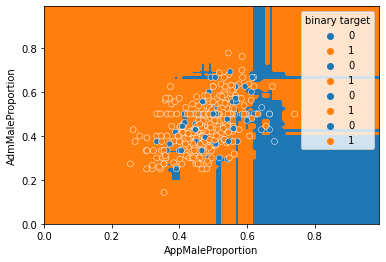

In [135]:
for m in binary_models:
    binary_models[m].fit(train_binary[['AppMaleProportion', 'AdmMaleProportion']], train_binary['binary target'])
    train_acc = binary_models[m].score(train_binary[['AppMaleProportion', 'AdmMaleProportion']], train_binary['binary target'])
    test_acc = binary_models[m].score(test_binary[['AppMaleProportion', 'AdmMaleProportion']], test_binary['binary target'])
    print(m, train_acc, test_acc)
    
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])

    xx, yy = np.meshgrid(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01))
    Z_string = binary_models[m].predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse = True)
    Z_int = Z_int.reshape(xx.shape)
    print(categories)
    plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
    sns.scatterplot(data = train_binary, x = 'AppMaleProportion', y = 'AdmMaleProportion', hue = 'binary target', cmap = sns_cmap)
#     plt.title('Logistic Regression on nba_train');
#     break
#     plt.show()
    

In [70]:
binary_models['dt'].predict(train_binary[['AppMaleProportion', 'AdmMaleProportion']])

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [161]:
from sklearn.metrics import confusion_matrix

In [192]:
# lr cm
confusion_matrix(test_binary['binary target'], binary_models['lr'].predict(test_binary[['AppMaleProportion', 'AdmMaleProportion']])) / len(test_binary)

array([[0. , 0.2],
       [0. , 0.8]])

In [174]:
train_binary['binary target'].value_counts()

1    254
0     62
Name: binary target, dtype: int64

In [175]:
len(train_binary)

316

In [173]:
confusion_matrix?

In [191]:
# lrb cm
confusion_matrix(test_binary['binary target'], binary_models['lrb'].predict(test_binary[['AppMaleProportion', 'AdmMaleProportion']])) / len(test_binary)

array([[0.1375, 0.0625],
       [0.275 , 0.525 ]])

In [171]:
train_binary['binary target'].value_counts()

1    254
0     62
Name: binary target, dtype: int64

In [172]:
test_binary['binary target'].value_counts()

1    64
0    16
Name: binary target, dtype: int64

In [164]:
# merged data

In [72]:
df_merged = df.merge(df_eth, left_index = True, right_index = True)[['AppMaleProportion', 'AdmMaleProportion',
                                                       'AppWhiteProportion', 'AdmWhiteProportion',
                                                       'Location_x', 'binary target']].rename(
                                                        columns = {'Location_x': 'Location'})
df_merged

,AppMaleProportion,AdmMaleProportion,AppWhiteProportion,AdmWhiteProportion,Location,binary target
Calculation1,,,,,,
ACALANES HIGH SCHOOL51315,0.450000,0.500000,0.675000,0.600000,INS,1
ADOLFO CAMARILLO HIGH SCHOOL50438,0.553191,0.500000,0.191489,0.375000,INS,1
ADRIAN C WILCOX HIGH SCHOOL53276,0.393939,0.285714,0.196970,0.285714,INS,1
AGOURA HIGH SCHOOL50003,0.542857,0.545455,0.585714,0.454545,INS,1
ALAMEDA SCIENCE & TECHLGY INST50029,0.620690,0.625000,0.206897,0.375000,INS,1
...,...,...,...,...,...,...
WESTLAKE HIGH SCHOOL53503,0.401709,0.294118,0.384615,0.294118,INS,1
WESTMONT HIGH SCHOOL53103,0.411765,0.454545,0.392157,0.454545,INS,1
WESTON HIGH SCHOOL222355,0.421053,0.500000,0.473684,0.666667,OOS,0


In [113]:
df_export = df_merged.copy()

In [114]:
df_export.index.name = 'Name'
df_export = df_export.iloc[:, :-1]
df_export.index = df_export.index.to_series().str[:10]
df_export.columns = ['AppMale', 'AdmMale', 'AppWhite', 'AdmWhite', 'Location']

In [115]:
df_export.sample(5, random_state=53)

,AppMale,AdmMale,AppWhite,AdmWhite,Location
Name,,,,,
SAINT FRAN,0.496063,0.520000,0.188976,0.120000,INS
NORTH ALLE,0.518519,0.300000,0.259259,0.400000,OOS
DOS PUEBLO,0.461538,0.363636,0.472527,0.454545,INS
SIERRA CAN,0.394737,0.500000,0.342105,0.400000,INS
THOUSAND O,0.518519,0.500000,0.574074,0.500000,INS


In [116]:
print(df_export.sample(5, random_state=53).head().to_latex())

\begin{tabular}{lrrrrl}
\toprule
{} &   AppMale &   AdmMale &  AppWhite &  AdmWhite & Location \\
Name       &           &           &           &           &          \\
\midrule
SAINT FRAN &  0.496063 &  0.520000 &  0.188976 &  0.120000 &      INS \\
NORTH ALLE &  0.518519 &  0.300000 &  0.259259 &  0.400000 &      OOS \\
DOS PUEBLO &  0.461538 &  0.363636 &  0.472527 &  0.454545 &      INS \\
SIERRA CAN &  0.394737 &  0.500000 &  0.342105 &  0.400000 &      INS \\
THOUSAND O &  0.518519 &  0.500000 &  0.574074 &  0.500000 &      INS \\
\bottomrule
\end{tabular}



In [73]:
df_merged.corr()

,AppMaleProportion,AdmMaleProportion,AppWhiteProportion,AdmWhiteProportion,binary target
AppMaleProportion,1.000000,0.514663,0.001233,-0.123277,-0.085253
AdmMaleProportion,0.514663,1.000000,0.122050,0.067881,-0.096873
AppWhiteProportion,0.001233,0.122050,1.000000,0.761913,-0.044211
AdmWhiteProportion,-0.123277,0.067881,0.761913,1.000000,-0.061124
binary target,-0.085253,-0.096873,-0.044211,-0.061124,1.000000


In [117]:
train_merged, test_merged = train_test_split(df_merged, test_size = 0.2, random_state = 6)

In [132]:
binary_models_merged = {
    'lr': LogisticRegression(),
    'lrb': LogisticRegression(class_weight = "balanced"),
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier()
}

In [133]:
features = ['AppMaleProportion', 'AdmMaleProportion', 'AppWhiteProportion', 'AdmWhiteProportion']

In [134]:
for m in binary_models_merged:
    binary_models_merged[m].fit(train_merged[features], train_merged['binary target'])
    train_acc = binary_models_merged[m].score(train_merged[features], train_merged['binary target'])
    test_acc = binary_models_merged[m].score(test_merged[features], test_merged['binary target'])
    print(m, train_acc, test_acc)
    
    # could add in precision and recall
    

lr 0.9006622516556292 0.9473684210526315
lrb 0.5761589403973509 0.631578947368421
dt 1.0 0.8947368421052632
rf 1.0 0.9473684210526315


In [121]:
# roc curve of binary logistic regression model

In [156]:
from sklearn.metrics import roc_curve, auc

auc =  0.5583333333333333


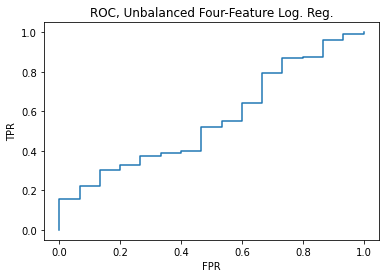

In [159]:
fpr, tpr, threshold = roc_curve(train_merged['binary target'], 
                               binary_models_merged['lr'].predict_proba(train_merged[features])[:, 1])

plt.plot(fpr, tpr);
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC, Unbalanced Four-Feature Log. Reg.');
print('auc = ', auc(fpr, tpr))
# plt.savefig('export/unbalancedroc.png')

auc =  0.5627450980392157


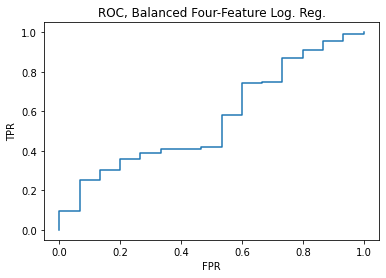

In [160]:
fpr, tpr, threshold = roc_curve(train_merged['binary target'], 
                               binary_models_merged['lrb'].predict_proba(train_merged[features])[:, 1])

plt.plot(fpr, tpr);
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC, Balanced Four-Feature Log. Reg.');
print('auc = ', auc(fpr, tpr))
# plt.savefig('export/balancedroc.png')

In [137]:
binary_models['lrb'].coef_, binary_models['lrb'].intercept_, 

(array([[-2.33117978, -0.49304826]]), array([1.37359416]))

In [138]:
binary_models_merged['lrb'].coef_, binary_models_merged['lrb'].intercept_

(array([[-0.68676338, -0.36403107, -0.10766983, -0.38821054]]),
 array([0.69725572]))

In [184]:
# lrb cm
confusion_matrix(test_merged['binary target'], binary_models_merged['lr'].predict(test_merged[['AppMaleProportion', 'AdmMaleProportion', 'AppWhiteProportion', 'AdmWhiteProportion']]))

array([[ 0,  2],
       [ 0, 36]])

In [183]:
# lrb cm
confusion_matrix(test_merged['binary target'], binary_models_merged['lrb'].predict(test_merged[['AppMaleProportion', 'AdmMaleProportion', 'AppWhiteProportion', 'AdmWhiteProportion']]))

array([[ 2,  0],
       [14, 22]])

### fairness criterion

In [ ]:
Y = train_merged['binary target']
A = train_merged[features]
R = binary_models_merged['lrb'].predict(train_merged[features])#[:, 1]

In [ ]:
# clearly these are garbage, pretty close to random model (0.5)
# only classifying well because of the severe class imbalance

In [ ]:
# plan: make A the category for whether or not a majority of applicants were male (or accepted)
# then look at separation and sufficiency

In [ ]:
A = train_merged['AppMaleProportion'] >= 0.5

In [ ]:
plt.scatter(R[A], Y[A], label = 'male majority', alpha = 0.4, color = 'r');
# plt.scatter(R[~A], Y[~A], label = 'female majority', alpha = 0.4);
plt.legend();

In [ ]:
plt.errorbar([0], [np.mean(Y[A][R[A] == 0])], color = 'red', alpha = 0.4, label = 'male',
            yerr=np.std(Y[A][R[A] == 0]) / 15, fmt='o') 
plt.errorbar([1], [np.mean(Y[A][R[A] == 1])], color = 'red', alpha = 0.4, label = 'male',
            yerr=np.std(Y[A][R[A] == 1]) / 15, fmt='o')

plt.errorbar([0], [np.mean(Y[~A][R[~A] == 0])], color = 'blue', alpha = 0.4, label = 'female',
            yerr=np.std(Y[~A][R[~A] == 0]) / 15, fmt='o')
plt.errorbar([1], [np.mean(Y[~A][R[~A] == 1])], color = 'blue', alpha = 0.4, label = 'female',
            yerr=np.std(Y[~A][R[~A] == 1]) / 15, fmt='o');

In [ ]:
np.mean(Y[~A][R[~A] == 1])

In [ ]:
np.mean(Y[~A][R[~A] == 0])

In [ ]:
# out of state schools have more female applicants??? 

## Regression models

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# given all other features, predict AdmWhiteProportion

In [ ]:
df_ohe = pd.get_dummies(df_merged, columns = ['Location']) \
.drop(['binary target', 'Location_INS'], axis = 1) \
.rename(columns = {'AdmWhiteProportion': 'TargetProportion'}) \
.iloc[:, [0, 1, 2, 4, 5, 3]]

In [ ]:
df_ohe

In [ ]:
train_ohe, test_ohe = train_test_split(df_ohe, test_size = 0.2, random_state = 17)

In [ ]:
regression_models = {
    'ols': LinearRegression(),
    'ridge': Ridge(),
    'ridgecv': RidgeCV(),
    'lasso': Lasso(),
    'lassocv': LassoCV(),
    'knn': KNeighborsRegressor()
}

In [ ]:
for m in regression_models:
    regression_models[m].fit(train_ohe.iloc[:, :-1], train_ohe.iloc[:, -1])
    train_rmse = np.mean((regression_models[m].predict(train_ohe.iloc[:, :-1]) - train_ohe.iloc[:, -1])**2)
    test_rmse = np.mean((regression_models[m].predict(test_ohe.iloc[:, :-1]) - test_ohe.iloc[:, -1])**2)
    if m == 'knn':
        print(m, train_rmse, test_rmse)
    else:
        print(f"{m}, {np.round(train_rmse, 3)}, {np.round(test_rmse, 3)}, {np.round(regression_models[m].coef_, 3)}, {np.round(regression_models[m].intercept_, 3)}")
    

In [ ]:
train_ohe.iloc[:, -1].mean()

In [ ]:
regression_models['lasso'].predict(train_ohe.iloc[:, :-1])

In [ ]:
df_ohe

In [ ]:
train_merged

## PyTorch Code

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

In [ ]:
class NNClassifier(nn.Module):
    def __init__(self, in_feat, hidden_dims=(1000, 500), extra_layer=False):
        super().__init__()
        self.extra_layer = extra_layer
        self.fc1 = nn.Linear(in_feat, hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[1])
        self.fc4 = nn.Linear(hidden_dims[1], 2)
        
    def forward(self, x):
        l1_out = nn.functional.relu(self.fc1(x))
        l2_out = nn.functional.relu(self.fc2(l1_out))
        l3_out = nn.functional.relu(self.fc3(l2_out)) if self.extra_layer else l2_out
        out = self.fc4(l3_out)
        return out
    
class NNRegressor(nn.Module):
    def __init__(self, in_feat, hidden_dims=(50, 25), extra_layer=False):
        super().__init__()
        self.extra_layer = extra_layer
        self.fc1 = nn.Linear(in_feat, hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[1])
        self.fc4 = nn.Linear(hidden_dims[1], 1)
        
    def forward(self, x):
        l1_out = nn.functional.relu(self.fc1(x))
        l2_out = nn.functional.relu(self.fc2(l1_out))
        l3_out = nn.functional.relu(self.fc3(l2_out)) if self.extra_layer else l2_out
        out = self.fc4(l3_out)
        return out

In [ ]:
test_ohe.iloc[:, -1].values[:,None].shape

In [ ]:
# Converting the DataFrame to a DataLoader
def df_to_torch(data, target, batch_size=5, classify=True):
    if classify:
        target = torch.tensor(target.values.astype(np.long))
    else:
        target = torch.tensor(target.values[:,None].astype(np.float32))
    data = torch.tensor(data.values.astype(np.float32)) 
    data_tensor = TensorDataset(data, target) 
    data_loader = DataLoader(dataset = data_tensor, batch_size = batch_size, shuffle = True)
    return data_loader

# 2 Feature Classifier Data
classify = True
train_data = train_binary[['AppMaleProportion', 'AdmMaleProportion']]
train_target = train_binary['binary target']
test_data = test_binary[['AppMaleProportion', 'AdmMaleProportion']]
test_target = test_binary['binary target']

# 4 Feature Classifier Data
classify = True
# train_data = train_merged[features]
# train_target = train_merged['binary target']
# test_data = test_merged[features]
# test_target = test_merged['binary target']

# 4 Feature Regression
classify = False
train_data = train_ohe.iloc[:, :-1]
train_target = train_ohe.iloc[:, -1]
test_data = test_ohe.iloc[:, :-1]
test_target = test_ohe.iloc[:, -1]

train_loader = df_to_torch(train_data, train_target, classify=classify)
test_loader = df_to_torch(test_data, test_target, classify=classify)

In [ ]:
num_pos = sum(train_target.values)
total = len(train_target.values)
num_neg = total-num_pos
weights = torch.tensor([num_neg, num_pos]).type(torch.float)/total
weights

In [ ]:
# Create NN
# net = NNClassifier(2, hidden_dims=(50, 25))
# net = NNClassifier(4, hidden_dims=(1000, 500), extra_layer=True)
net = NNRegressor(5)

In [ ]:
net

In [ ]:
# Training
# criterion = nn.CrossEntropyLoss()
# criterion = nn.CrossEntropyLoss(weight=weights)
criterion = nn.MSELoss(reduction="sum")
# optimizer = optim.SGD(net.parameters(), 0.1)
optimizer = optim.Adam(net.parameters(),lr=0.001)
n_epochs = 200

for epoch in range(n_epochs):
    running_loss = 0
    for (data, target) in train_loader:
        optimizer.zero_grad()
        out = net(data)
        loss = criterion(out, target)
        loss.backward()
        optimizer.step()    # Does the update
        
        running_loss += loss.item()
    if epoch % 10 == 0:
        print("Epoch {}, Loss: {}".format(epoch+1, running_loss/total))

In [ ]:
# Calculate Training Accuracy
with torch.no_grad():
        total = 0
        correct = 0
        for i, (data, target) in enumerate(train_loader):
            outputs = net(data)
            _, predicted = torch.max(outputs.data, 1)
#             print(predicted)
            total += target.size(0)
            correct += (predicted == target).sum().item()
        train_acc = correct/total*100
print("Training Accuracy: {:.2f}".format(train_acc))

In [ ]:
# Calculate Testing Accuracy
with torch.no_grad():
        total = 0
        correct = 0
        for i, (data, target) in enumerate(test_loader):
            outputs = net(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
        test_acc = correct/total*100
print("Test Accuracy: {:.2f}".format(test_acc))

In [ ]:
# Calculate Regression Test MSE
with torch.no_grad():
    loss = 0
    total = 0
    for i, (data, target) in enumerate(test_loader):
        loss += sum(((net(data)-target)**2))
        total += data.size(0)
    loss /= total
print("Test MSE: {:.4f}".format(loss.data.numpy()[0]))